# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [3]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [127]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Высшее', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Ученая степень'}


MARITAL_STATUS
{'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Гражданский брак', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'ЧОП/Детективная д-ть', 'Маркетинг', 'Сборочные производства', 'Наука', 'Туризм', 'Юридические услуги/нотариальные услуги', 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Подбор персонала', 'Информационные технологии', 'Строительство', 'Логистика', 'Энергетика', 'Салоны красоты и здоровья', 'Страхование', 'Государственная служба', 'Информационные услуги', 'Коммунальное хоз-во/Дорожные службы', 'Образование', 'Управляющая компания', 'Сельское хозяйство', 'Банк/Финансы', 'Недвижимость', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства', 'Развлечения/Искусство', 'Нефтегазовая промышленность', 'Другие сферы', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [128]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски есть в следующих столбцах:

In [25]:
df_count = df.count()
for column in df.columns:
    if df_count[column] < df.shape[0]:
        print(column)

GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
TP_PROVINCE
REGION_NM
WORK_TIME
PREVIOUS_CARD_NUM_UTILIZED


Для категориальных данных (GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE, REGION_NM) можно ввести вместо NaN значение "неопределено".

Для WORK_TIME можно заменить недостающие данные медианой. Медиана более устойчива к выбросам, чем среднее, а в нашем случае выбросы есть (см ниже).

PREVIOUS_CARD_NUM_UTILIZED - 'количество уже утилизированных карт ( если пусто - 0) ', следовательно, пропущенные значения заменяем нулями.

count    2.741600e+04
mean     1.895821e+02
std      1.732080e+04
min      1.000000e+00
25%      2.400000e+01
50%      4.800000e+01
75%      1.100000e+02
max      2.867959e+06
Name: WORK_TIME, dtype: float64


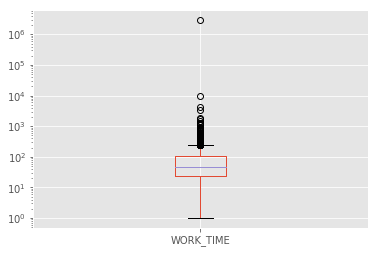

In [26]:
print(df.WORK_TIME.describe())
df.WORK_TIME.plot(kind = 'box', logy = True)

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные признаки нужно закодировать с помощью dummy переменных.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [27]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ##Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    ##Что-то делала с пропусками
    #GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE, REGION_NM
    cat_nan_columns = ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'REGION_NM']
    for column in cat_nan_columns:
        df.loc[df[column].isnull(),column] = 'не определено'


    #WORK_TIME
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = df_output['WORK_TIME'].median()
    #PREVIOUS_CARD_NUM_UTILIZED
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(),'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    
    ##Кодировала категориальные признаки
    cat_columns = []
    not_cat_columns = []

    for i in df_output.columns:
        if str(df_output[i].dtype) == 'object' and i != 'sample':
            cat_columns.append(i)
        else:
            not_cat_columns.append(i)
    

    df_dummy = pd.get_dummies(df_output[cat_columns])

    df_output = pd.concat([df_output[not_cat_columns].reset_index(), df_dummy], axis=1)
    
    return df_output

In [28]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [29]:
y = list(df_train_preproc['TARGET'])
y_validate = list(df_test_preproc['TARGET'])
X = df_train_preproc.drop(['TARGET'], axis=1)
X_validate = df_test_preproc.drop(['TARGET'], axis=1)


#### Задание 5. Обучение и оценка качества разных моделей

In [33]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

lrc = LogisticRegression()
lrc.fit(X_train, y_train)
lrc_predict = lrc.predict(X_test)


In [57]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

dtc_score = [accuracy_score(y_test, dtc_predict), precision_score(y_test, dtc_predict), recall_score(y_test, dtc_predict)]
rfc_score = [accuracy_score(y_test, rfc_predict), precision_score(y_test, rfc_predict), recall_score(y_test, rfc_predict)]
lrc_score = [accuracy_score(y_test, lrc_predict), precision_score(y_test, lrc_predict), recall_score(y_test, lrc_predict)]


print("accuracy_score for DecisionTreeClassifier: %2.2f" % (dtc_score[0]))
print("accuracy_score for RandomForestClassifier: %2.2f" % (rfc_score[0]))
print("accuracy_score for LogisticRegression: %2.2f\n" % (lrc_score[0]))

print("precision_score for DecisionTreeClassifier: %2.2f" % (dtc_score[1]))
print("precision_score for RandomForestClassifier: %2.2f" % (rfc_score[1]))
print("precision_score for LogisticRegression: %2.2f\n" % (lrc_score[1])) 

print("recall_score for DecisionTreeClassifier: %2.2f" % (dtc_score[2]))
print("recall_score for RandomForestClassifier: %2.2f" % (rfc_score[2]))
print("recall_score for LogisticRegression: %2.2f\n" % (lrc_score[2])) 



accuracy_score for DecisionTreeClassifier: 0.81
accuracy_score for RandomForestClassifier: 0.88
accuracy_score for LogisticRegression: 0.88

precision_score for DecisionTreeClassifier: 0.20
precision_score for RandomForestClassifier: 0.56
precision_score for LogisticRegression: 0.00

recall_score for DecisionTreeClassifier: 0.20
recall_score for RandomForestClassifier: 0.02
recall_score for LogisticRegression: 0.00



C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


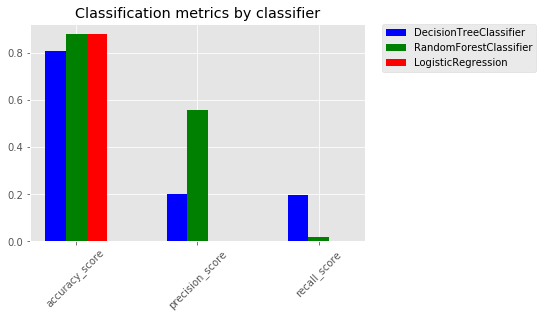

In [80]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

multiple_bars = plt.figure()

x = np.arange(3)
width = 0.17

ax = plt.subplot(111)
ax.bar(x, dtc_score, width = width,color='b',align='center', label = "DecisionTreeClassifier")
ax.bar(x + width, rfc_score, width = width,color='g',align='center', label = "RandomForestClassifier")
ax.bar(x + 2 * width, lrc_score, width = width,color='r',align='center', label= "LogisticRegression")
ax.set_title('Classification metrics by classifier')

xTickMarks = ["accuracy_score", "precision_score", "recall_score"]
ax.set_xticks(x+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

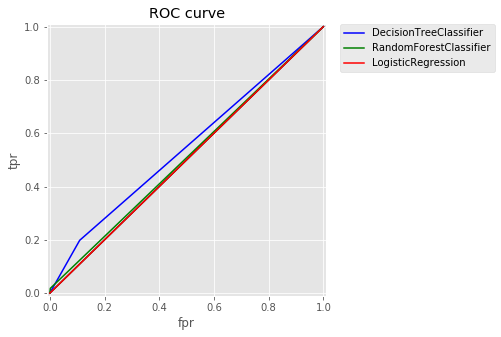

roc_auc_score for DecisionTreeClassifier: 0.54
roc_auc_score for RandomForestClassifier: 0.51
roc_auc_score for LogisticRegression: 0.50



In [82]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
from sklearn.metrics import roc_auc_score, roc_curve

dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc_predict)
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_predict)
lrc_fpr, lrc_tpr, lrc_thresholds = roc_curve(y_test, lrc_predict)
plt.figure(figsize=(5, 5))

plt.plot([0, 1], [0, 1], 'k')
plt.plot(dtc_fpr, dtc_tpr, 'b', label = "DecisionTreeClassifier")
plt.plot(rfc_fpr, rfc_tpr, 'g', label = "RandomForestClassifier")
plt.plot(lrc_fpr, lrc_tpr, 'r', label= "LogisticRegression")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()

print("roc_auc_score for DecisionTreeClassifier: %2.2f" % (roc_auc_score(y_test, dtc_predict)))
print("roc_auc_score for RandomForestClassifier: %2.2f" % (roc_auc_score(y_test, rfc_predict)))
print("roc_auc_score for LogisticRegression: %2.2f\n" % (roc_auc_score(y_test, lrc_predict))) 

In [109]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
iter = 0
avg_dtc_roc_auc = 0
avg_rfc_roc_auc = 0
avg_lrc_roc_auc = 0
for train_index, test_index in cv.split(X, y):
    print("iter:", iter)
    iter += 1
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X.iloc[train_index,:], list(map(y.__getitem__, train_index)))
    dtc_predict = dtc.predict(X.iloc[test_index,:]) 
    roc_auc = roc_auc_score(list(map(y.__getitem__, test_index)), dtc_predict)
    avg_dtc_roc_auc += roc_auc
    
    rfc = RandomForestClassifier()
    rfc.fit(X.iloc[train_index,:], list(map(y.__getitem__, train_index)))
    rfc_predict = rfc.predict(X.iloc[test_index,:]) 
    roc_auc = roc_auc_score(list(map(y.__getitem__, test_index)), rfc_predict)
    avg_rfc_roc_auc += roc_auc
   
    lrc = LogisticRegression()
    lrc.fit(X.iloc[train_index,:], list(map(y.__getitem__, train_index)))
    lrc_predict = lrc.predict(X.iloc[test_index,:]) 
    roc_auc = roc_auc_score(list(map(y.__getitem__, test_index)), lrc_predict)
    avg_lrc_roc_auc += roc_auc

    
avg_dtc_roc_auc /= 10
avg_rfc_roc_auc /= 10
avg_lrc_roc_auc /= 10
print("DecisionTreeClassifier: avg roc_auc=%2.2f" % (avg_dtc_roc_auc))
print("RandomForestClassifier: avg roc_auc=%2.2f" % (avg_rfc_roc_auc))
print("LogisticRegression:     avg roc_auc=%2.2f" % (avg_lrc_roc_auc))

iter: 0
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
DecisionTreeClassifier: avg roc_auc=0.54
RandomForestClassifier: avg roc_auc=0.50
LogisticRegression:     avg roc_auc=0.50


In [114]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
dtc = DecisionTreeClassifier()
dtc.fit(X, y)
dtc_predict = dtc.predict_proba(X_validate) 

In [117]:
# Померить roc_auc на тесте
roc_auc = roc_auc_score(y_validate, dtc_predict[:,1])
print("DecisionTreeClassifier validation: roc_auc=%2.2f" % (roc_auc))

DecisionTreeClassifier validation: roc_auc=0.50
